# Testing a Model

*Based on Kevin Markham's video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

    jupyter notebook 05_model_evaluation_ta.ipynb

In [1]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

### Logistic regression

In [2]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
y_pred = logreg.predict(X)
print(y_pred)
print("{0} predictions".format(len(y_pred)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150 predictions


Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [3]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.96


![Estimating coefficients](images/estimating_coefficients.png)

## Model Evaluation Metrics for Regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

## Read More ##
http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generating an Optimal KNN classifier

Look back at `04_model_training` and see how high an accuracy you can achieve for different values of `n_neighbors`.  Try to understand why different values do better than others in terms of the pictures we saw in `04_model_training`. 

You can change `feature1` and `feature2` in the cell below to visualize different projections of the data.

/Users/dtamayo/miniconda2/envs/ml2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


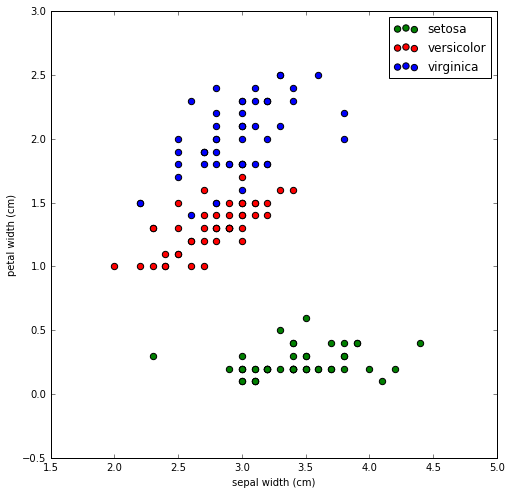

In [4]:
feature1 = 1 # feature on x axis
feature2 = 3 # feature on y axis

data = X
f1vals = X[:,feature1]
f2vals = X[:,feature2]

import numpy as np
targets = dict(zip(range(3), iris.target_names))
features = dict(zip(range(4), iris.feature_names))
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['g', 'r', 'b']
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
for species in targets.keys():
    f1 = f1vals[np.where(y==species)]
    f2 = f2vals[np.where(y==species)]
    ax.scatter(f1, f2, c=colors[species], label=targets[species], s=40)
    ax.set(xlabel=features[feature1], ylabel=features[feature2])
    ax.legend()

### KNN (K=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.966666666667


### KNN (K=1)

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


    jupyter notebook 05_model_evaluation_tts.ipynb

# Training Accuracy

Prediction accuracy on the same set of data you trained your model with.

### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

![Overfitting](images/05_overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

# How Can We Avoid Overfitting?

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [7]:
# print the shapes of X and y
print X.shape
print y.shape

(150, 4)
(150,)


In [8]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

![Train/test split](images/05_train_test_split.png)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [9]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [10]:
# print the shapes of the new X objects
print X_train.shape
print X_test.shape

(90, 4)
(60, 4)


In [11]:
# print the shapes of the new y objects
print y_train.shape
print y_test.shape

(90,)
(60,)


In [12]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print metrics.accuracy_score(y_test, y_pred)

0.95


Repeat for KNN with K=5:

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


Repeat for KNN with K=1:

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


# Can you find an even better value for K?

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = [] # calculate accuracies for each value of K!

#Now we plot:

import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [16]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

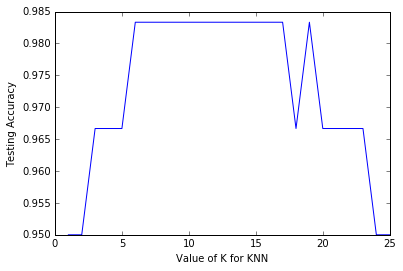

In [17]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

![Overfitting](images/NCAAoverfit.png)

## Making predictions on out-of-sample data

In [18]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
print(knn.predict([[3, 5, 4, 2]]))

[1]


## Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

![Train/test split](images/05_train_test_split.png)

# Splitting a Second Time? Train/Cross-Validation/Test Split

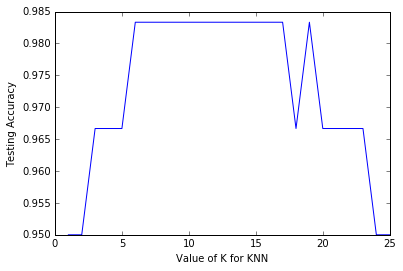

In [19]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Resources

- Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)
- Video: [Estimating prediction error](https://www.youtube.com/watch?v=_2ij6eaaSl0&t=2m34s) (12 minutes, starting at 2:34) by Hastie and Tibshirani
- [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
    - [Guiding questions](https://github.com/justmarkham/DAT5/blob/master/homework/06_bias_variance.md) when reading this article
- Video: [Visualizing bias and variance](http://work.caltech.edu/library/081.html) (15 minutes) by Abu-Mostafa

## Credit

- Kevin Markham